# Section A. Model Complexity and Model Selection
## Question 2: Leave-One-Out Cross Validation

In [1]:
library(reshape2)
library(ggplot2)
library(corrplot)

# Load data: it's built in to R,
train <- read.csv('Task1A_train.csv')

corrplot 0.84 loaded


In [3]:
index = 1:42
train.data <- train[1] # grab the first column, leave out the species (last column)
train.label <- train[index,2]

dim(train.data) # 42 records

[1] 42  1

In [4]:
############################################## KNN function ####################################################
knn <- function(train.data, train.label, test.data, K=3){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    ## calculate manhattan distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), method= 'manhattan'))[1:test.len, (test.len+1):(test.len+train.len)]

        #find its K nearest neighbours from training sampels
        nn <- as.data.frame(sort(dist, index.return = TRUE))[1:K,2]
        #return the predicted labels by the average of the neighbors’ values.
    return (mean(train.label[nn]))
}

### Question 2 (I)
Defining a Leave-One-Out cross-validation (CV) function for KNN regressor: 
**cv(train.data, train.label, K, numFold)**
which takes the training data and their labels, K value, the number of folds, and returns errors for different folds of the training data.

In [5]:
################################## Leave-One-Out Cross Validation function #########################################
cv <- function(train.data, train.label, K, numFold){
    mse = 0
    for(i in 1:numFold){
        
        #training set
        train_data <- as.data.frame(train.data[-i,])
        colnames(train_data) = colnames(train.data)
        train_label <- train.label[-i]

        #validation set
        test_data <- as.data.frame(train.data[i,])
        colnames(test_data) = colnames(train.data)
        test_label <- train.label[i]

        #calling knn function to calculate predicted value of i sample
        test_label[i]<- knn(train_data, train_label, test_data, K)
        # calculation squared error
        mse = mse + (test_label[i]-train.label[i])^2
        }

    #returning calculated mean squared error
    return (mse/numFold)
        
}

### Question 2 (II)
Changing the value of K=1,..,15 in KNN regressor, and for each K computing the average of error values for folds.

In [6]:
#dataframe to store the error
mse <- data.frame('K'=1:15)
for (k in 1:15){
    #calling cv function to calculate mse for every value of k from 1 to 15
    mse[k,'error'] <- cv(train.data, train.label, K=k,nrow(train.data))
    }

Ploting the average of error values versus 1/K for K=1,..,15 in KNN regressor.

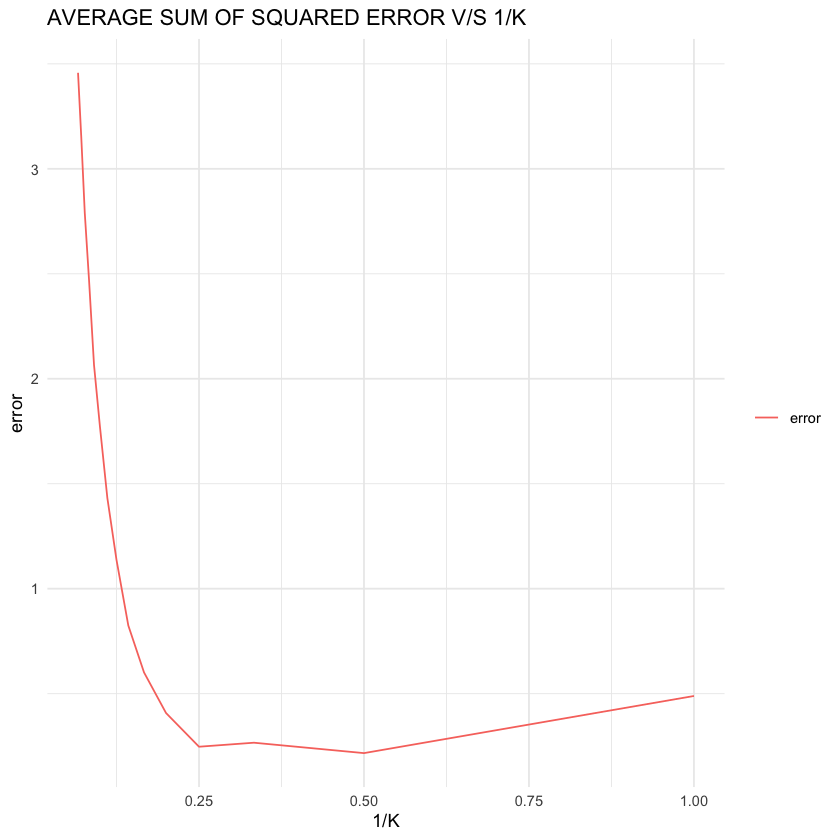

In [10]:
#Plotting the average of error values versus 1/K for K=1,..,15 in KNN regressor
ggplot(data=mse, aes(x=1/K, y=error, color = 'error')) + geom_line() +
       scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("AVERAGE SUM OF SQUARED ERROR V/S 1/K")

### Question 2 (III)
The graph above is lowest at 1/k = 0.5, which indicates the optimal solution for k. The optimal value is k = 2.